## COVID-19 Impact on Community Mobility - Analysis based on Apple dataset
----
@prithivida

#### I have taken ONLY a handful countires which are either touted as a model for fighting COVID-19 or the ones which are heavily impacted.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

#### Note: You need this ONLY if you want a continent wise plot

In [4]:
country2continent = pd.read_csv("countries2continents.csv").fillna('')
country2continent = country2continent[['name', 'region']]
country2continent.set_index('name',inplace=True)
country2continent = country2continent.to_dict()['region']

In [6]:
apple_mob = pd.read_csv("applemobilitytrends-2020-05-01.csv").fillna('')
apple_mob = apple_mob[(apple_mob['geo_type'] == 'country/region') & (apple_mob['region'].isin(['Germany','United States','UK', 'Spain', 'Italy', 'China', 'India','Taiwan', 'South Korea']))]
automobile = apple_mob[(apple_mob['geo_type'] == 'country/region')]
automobile['continent'] = automobile.apply(lambda row : country2continent.get(row['region']), axis=1, result_type="expand")
automobile.sample(5)

geo_type   region transportation_type alternative_name 2020-01-13  \
139  country/region       UK             driving   United Kingdom        100   
65   country/region    Italy             driving           Italia        100   
45   country/region  Germany             driving      Deutschland        100   
132  country/region   Taiwan             driving               台灣        100   
123  country/region    Spain             driving           España        100   

    2020-01-14 2020-01-15 2020-01-16 2020-01-17 2020-01-18    ...     \
139     104.86      106.4     104.28     109.27      108.3    ...      
65      102.63     105.41     106.18     114.69     127.45    ...      
45      101.31     102.82     104.61     114.38     109.65    ...      
132     106.97     113.81     118.64      136.4     135.78    ...      
123     101.06     103.08     107.43     124.86     123.89    ...      

    2020-04-23 2020-04-24 2020-04-25 2020-04-26 2020-04-27 2020-04-28  \
139      42.36      45.69      39.03       34.9       41.8      41.61   
65       26.26      27.09      21.75      22.82       26.3      27.48   
45       70.28      67.88       62.8      68.59      70.08      69.04   
132      76.23      96.47       98.3       85.1      78.86      82.17   
123      25.06      24.36      20.08      20.09      26.01      26.92   

    2020-04-29 2020-04-30 2020-05-01 continent  
139      42.53      43.52      47.82      None  
65        28.7      28.34      22.26    Europe  
45       70.61       70.3      62.46    Europe  
132      85.96     108.03     122.88      None  
123      27.82      31.67      25.78    Europe  

[5 rows x 115 columns]

In [7]:
automobile_ts = pd.melt(automobile, id_vars=["region", "continent"], var_name="Date", value_name="Value")
automobile_ts = automobile_ts[~(automobile_ts['Value'].str.isnumeric() == False)]
automobile_ts.head()

region continent        Date Value
60  Germany    Europe  2020-01-13   100
61  Germany    Europe  2020-01-13   100
62  Germany    Europe  2020-01-13   100
63    India      Asia  2020-01-13   100
64    India      Asia  2020-01-13   100

In [8]:
automobile_ts['Value'] = automobile_ts['Value'].astype('float')
automobile_ts['Date'] = pd.to_datetime(automobile_ts['Date'])
automobile_ts['month'] = automobile_ts['Date'].dt.month

In [9]:
automobile_monthly = automobile_ts.groupby(['region', 'month'])['Value'].agg('sum').reset_index()

[Text(0.5, 1.0, 'Apple Maps: Monthly change in actual mobility requests since COVID-19')]

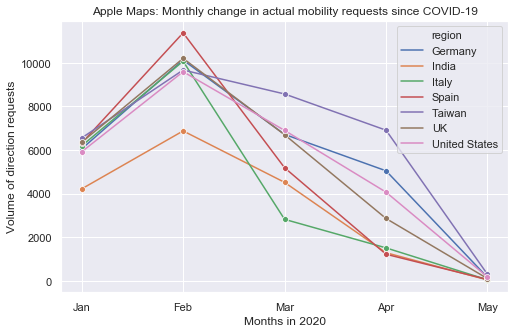

In [14]:
#automobile_monthly.plot(x='month', y='Value', style='.-', markevery=10)
plt.xticks([1,2,3,4,5], ["Jan", "Feb", "Mar","Apr","May"])
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lineplot(data=automobile_monthly, x='month', marker="o", y='Value', hue='region')
ax.set(xlabel='Months in 2020', ylabel='Volume of direction requests')
ax.set(title='Apple Maps: Monthly change in actual mobility requests since COVID-19')

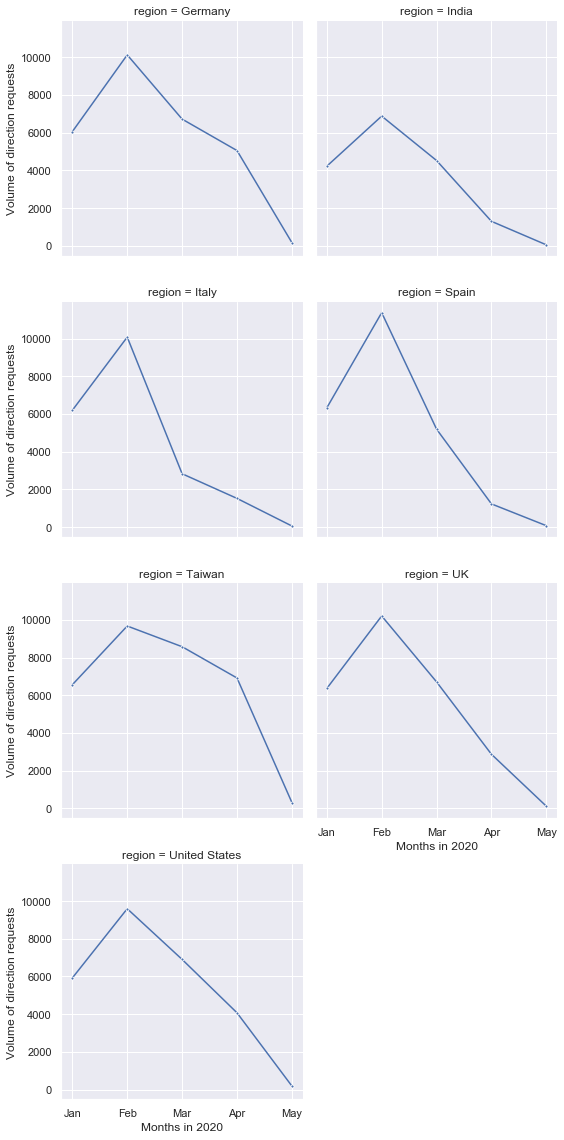

In [16]:
g = sns.FacetGrid(automobile_monthly, col="region", col_wrap=2, height=4, size=4, aspect=1)
g = g.map(sns.lineplot, "month", "Value", marker=".")
g.set(xticklabels=["Jan", "Feb", "Mar","Apr","May"])
g.set(xticks=[1,2,3,4,5])
g.set(xlabel='Months in 2020', ylabel='Volume of direction requests')